In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from sklearn.preprocessing import StandardScaler
from class_vehicle_data import Vehicle_data

mkdir: cannot create directory ‘data/Tesla’: File exists


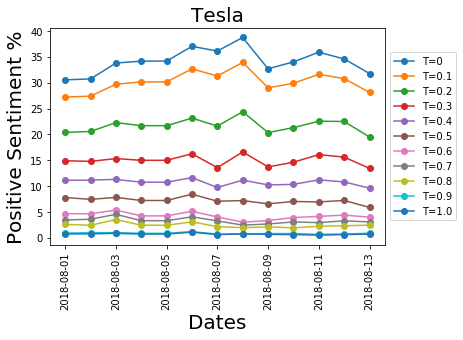

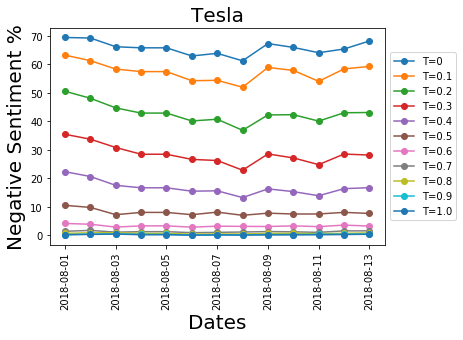

In [2]:
output = ["output_t0","output_t10","output_t20","output_t30","output_t40","output_t50","output_t60","output_t70","output_t80","output_t90","output_t100"]
thresholds = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
car_company = ["BMW","Ford","Mercedes","Porsche","Tesla","Toyota"]


# Initialize all car data
all_cars = [Vehicle_data() for k in range(len(output))]

b1_scale = 1.0e-3
b2_scale = 1.0e-3
b3_scale = 1.0
sigma_scale = 1.0

N_mcmc_burn = 1000
N_mcmc_walkers=300
N_mcmc_runs =3000

# The car we want to focus on
target_car=car_company[4]

new_folder="data/"+target_car
! mkdir $new_folder

# Read in all the data for a specific vehicle
for k in range(len(all_cars)):
    file = "data/"+output[k]+"/"+target_car+"_daily_data.txt"
    threshold = thresholds[k]
    car = all_cars[k]
    car.read_in_data(file)
    car.fill_NA()
    y_pos, y_neg, y_neu = car.return_sentiment_data()
    #y_pos,y_neg,y_neu =car.scale_data_Ztransform()
    #y_pos,y_neg,y_neu =car.scale_data_MinMaxTransform(Xmin=-1,Xmax=1)
    
    plt.plot(car.car_data["Dates"],y_pos,"-o",label="T="+str(threshold))
    
plt.title(target_car,size=20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation='vertical')
plt.xlabel("Dates",size=20)
plt.ylabel("Positive Sentiment %",size=20)
plt.savefig("data/"+target_car+"/"+target_car+"_pos_sentiment_curves_all_thresholds.pdf",bbox_inches="tight")
plt.show()

#==========================================================================================================

plt.clf()

# Read in all the data for a specific vehicle
for k in range(len(all_cars)):
    file = "data/"+output[k]+"/"+target_car+"_daily_data.txt"
    threshold = thresholds[k]
    car = all_cars[k]
    y_pos, y_neg, y_neu = car.return_sentiment_data()
    #y_pos,y_neg,y_neu =car.scale_data_Ztransform()
    #y_pos,y_neg,y_neu =car.scale_data_MinMaxTransform(Xmin=-1,Xmax=1)
    
    plt.plot(car.car_data["Dates"],y_neg,"-o",label="T="+str(threshold))
    
plt.title(target_car,size=20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation='vertical')
plt.xlabel("Dates",size=20)
plt.ylabel("Negative Sentiment %",size=20)
plt.savefig("data/"+target_car+"/"+target_car+"_neg_sentiment_curves_all_thresholds.pdf",bbox_inches="tight")
plt.show()

# We will combine all curves for different thresholds          
 
 
<p></p>

<font size="3">
   
In order to combine the curves $\hat{y}(x)$ generated by different thresholds, we will compute the expectation value that the curve $\hat{y}(x)$, which is either the negative or positive sentiment curves, is the true positive, or true negative curves. The expectation value is is computed as follows

\begin{equation}
\langle \hat{y}(x) \rangle = \int dT \ \hat{y}(x,T) P(\hat{y},y=\hat{y},T) 
\end{equation}
\begin{equation}
= \int dT \ \hat{y}(x,T)P(\hat{y}|y=\hat{y},T) P(y=\hat{y},T),
\end{equation}
\begin{equation}
= \int dT \ \hat{y}(x,T)P(\hat{y}|y=\hat{y},T) P(y=\hat{y}|T)P(T).
\end{equation}

For the puposes of our analysis, we will assume a uniform probablity distribution for $T$ over its range. 

---
---

# Interpretation of model weight factors
<p></p>
<div style="text-align: left">
To better understand this formula, we will explicitly write out the integral over $T$ for both the positive $\text{Pos}(x)$ and negative $\text{Neg}(x)$ curves and discuss the individual probability density functions in the integrand
</div>

---

\begin{align}
\langle \text{TruePos}(x) \rangle &= \int dT \ \text{Pos}(x,T)P(\hat{y}=1 \ |y=1,T) P(y=1 \ |T)P(T)  \\
\langle \text{FalsePos}(x) \rangle &= \int dT \ \text{Pos}(x,T)P(\hat{y}=1 \ |y=-1,T) P(y=-1 \ |T)P(T)   
\end{align}

---

\begin{align}
\langle \text{TrueNeg}(x) \rangle  &= \int dT \ \text{Neg}(x,T)P(\hat{y}=-1 \ |y=-1,T) P(y=-1 \ |T)P(T) \\
\langle \text{FalseNeg}(x) \rangle &= \int dT \ \text{Neg}(x,T)P(\hat{y}=-1 \ |y=1,T) P(y=1 \ |T)P(T)
\end{align}

---

<p></p>
The probability density function  
\begin{equation}
P(\hat{y}=1|y=1,T),
\end{equation}
<p></p>
is the probability of the model classifying the sentiment as positive, given that the real sentiment is also positive, for a given threshold. This is known as the <b>precision</b> of the classifier.
<p></p>
The probability 
\begin{equation}
P(y=1|T), 
\end{equation}
<p></p>
is simply the probability that a given sentiment is positive, given a value of T.

---

<p></p>
Similarly, 
\begin{equation}
P(\hat{y}=-1|y=-1,T),
\end{equation}
<p></p>
is the probability of the model classifying the sentiment as negative, given that the real sentiment is also negative.
<p></p>
For a given threshold
\begin{equation}
P(y=-1|T),
\end{equation}
<p></p>
is the probability that a given sentiment is negative, given a value of T.

---

When these probability density functions are multiplied together, they are a measure of how much weight to assign to the predictions of a model at a given threshold.

---
\begin{equation}
\text{True Positive Weight} = W_{tp}(T) \\
\end{equation}
\begin{equation}
 = P(\hat{y}=1 \ |y=1,T)P(y=1|T)
\end{equation}

---

\begin{equation}
\text{False Positive Weight} = W_{fp}(T) \\
\end{equation}
\begin{equation}
 =  P(\hat{y}=1 \ |y=-1,T)P(y=-1|T)
\end{equation}

---

\begin{equation}
\text{True Negative Weight} = W_{tn}(T) \\
\end{equation}

\begin{equation}
 =  P(\hat{y}=-1 \ |y=-1,T)P(y=-1|T)
\end{equation}

---

\begin{equation}
\text{False Negative Weight} = W_{fn}(T) \\
\end{equation}

\begin{equation}
 =  P(\hat{y}=-1 \ |y=1,T)P(y=1|T)
\end{equation}

---

Intuitively, the weight factors have a high score when the model at a given $T$ is accurate and there are alot of samples. 


---
---


</font>

# Model Assumptions

In order to carry out our analysis, the probabilities

$$
P(\hat{y}= \pm 1 \ | y=1,T),P(y= \pm 1 \ | T),
$$

will be assumed to be the same as the values when we tested our models on the labelled twitter data.

# Weight Normalization

Furthermore, we will normalize the weights according to

\begin{equation}
1 = \sum_{y=-1,1} \int_0^1 dT \ P(\hat{y}= \pm 1 \ | y,T)P(y|T),
\end{equation}

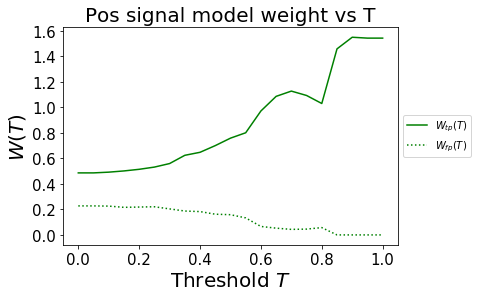

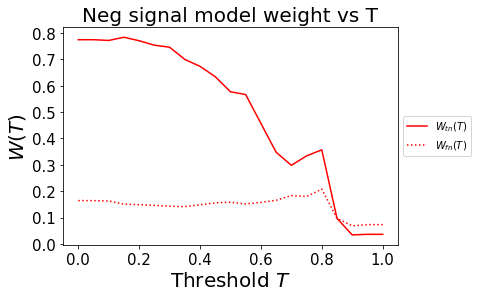

In [3]:
#
# Let us compute the model weights, W_tp, W_tn, W_fp, W_fn and plot them vs T 
#

file_name="sentiment_model_tweet_test_scores.txt"
T, prob_tp,prob_fp, prob_tn,prob_fn, prob_pos, prob_neg = Vehicle_data.return_model_training_results_prob(file_name)


pos_norm = np.trapz(prob_tp*prob_pos+prob_fp*prob_pos, x=T)
neg_norm = np.trapz(prob_tn*prob_pos+prob_fn*prob_pos, x=T)

w_tp = prob_tp*prob_pos/pos_norm
w_fp = prob_fp*prob_pos/pos_norm

w_tn = prob_tn*prob_neg/neg_norm
w_fn = prob_fn*prob_neg/neg_norm

plt.title("Pos signal model weight vs T",size=20)
plt.plot(T,w_tp,label=r"$W_{tp}(T)$",color="green")
plt.plot(T,w_fp,label=r"$W_{fp}(T)$",color="green",linestyle=":")
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel("Threshold $T$",size=20)
plt.ylabel("$W(T)$",size=20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("data/"+target_car+"/Model_Weights_Positive.pdf",bbox_inches="tight")
plt.show()

plt.title("Neg signal model weight vs T",size=20)
plt.plot(T,w_tn,label=r"$W_{tn}(T)$",color="red")
plt.plot(T,w_fn,label=r"$W_{fn}(T)$",color="red",linestyle=":")
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel("Threshold $T$",size=20)
plt.ylabel("$W(T)$",size=20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("data/"+target_car+"/Model_Weights_Negative.pdf",bbox_inches="tight")
plt.show()

# Combine the sentiment curves for different thresholds using the positive and negative sentiment weights 
<font size="3">
<p></p>
<p></p>
Now that we have computed the model weights $W(T)$ for different thresholds, we will marginalize over all models as <p></p>
\begin{align}
\text{TruePos}(x) = \int_0^1 dT \ \text{Pos}(x,T) W_{tp}(T), \\
\text{TrueNeg}(x) = \int_0^1 dT \ \text{Neg}(x,T) W_{tn}(T).
\end{align}
<p></p>   
In addition to the true positive and true negative signals, we will include the estimates of the false positives and false negative signals to give us an idea of how much of our daily sentiment signal is expected to be incorrectly classified. We will see that since our classifier scored well in the twitter data, these contributions are weak compared to the signal,  
\begin{align}
\text{FalsePos}(x) = \int_0^1 dT \ \text{Pos}(x,T) W_{fp}(T), \\
\text{FalseNeg}(x) = \int_0^1 dT \ \text{Neg}(x,T) W_{fn}(T).
\end{align}
<p></p>       
    
</font>

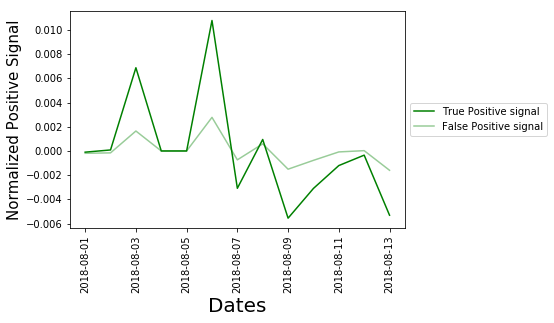

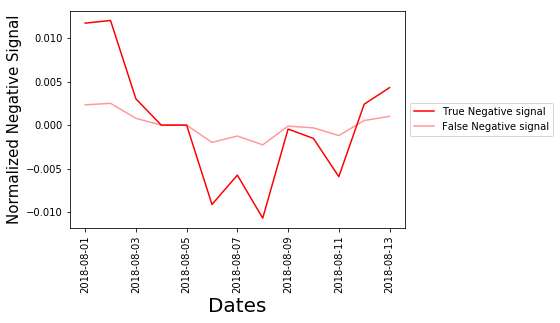

In [4]:
# Now We combine all of the curves

N =len(all_cars[0].car_data["Dates"])

dates = all_cars[0].car_data["Dates"]

y_pos_tot = np.zeros(N)
y_neg_tot = np.zeros(N)
y_neu_tot = np.zeros(N)

y_tp = np.zeros(N)
y_fp = np.zeros(N)

y_tn = np.zeros(N)
y_fn = np.zeros(N)

# Lopp over all thresholds
for k in range(len(all_cars)):
    #y_pos,y_neg,y_neu =all_cars[k].return_sentiment_data()
    y_pos,y_neg,y_neu =all_cars[k].scale_data_Ztransform()
    #y_pos,y_neg,y_neu =all_cars[k].scale_data_MinMaxTransform(Xmin=-1,Xmax=1)
    #y_pos,y_neg,y_neu =all_cars[k].daily_sentiment_return()

    #y_pos_tot += prob_pos[k]*prob_tp[k]*y_pos
    y_tp += w_tp[k]*y_pos
    y_fp += w_fn[k]*y_pos
    
    y_tn += w_tn[k]*y_neg
    y_fn += w_fn[k]*y_neg
    

# Scale the data to improve the sampling
y_tp = b1_scale*y_tp
y_fp = b1_scale*y_fp

y_tn = b2_scale*y_tn
y_fn = b2_scale*y_fn

# Now we plot the normalized Positive and negative sentiment signal curves for both the expected true signals, and the 
# expected false signal.
    
plt.plot(dates,y_tp,label="True Positive signal",color="g")
plt.plot(dates,y_fp,label="False Positive signal",color="g",alpha=0.4)
plt.ylabel("Normalized Positive Signal",size=15)
plt.xticks(rotation='vertical')
plt.xlabel("Dates",size=20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("data/"+target_car+"/"+target_car+"_normed_pos_signal.pdf",bbox_inches="tight")
plt.show()

plt.plot(dates,y_tn,label="True Negative signal",color="r")
plt.plot(dates,y_fn,label="False Negative signal",color="r",alpha=0.4)
plt.ylabel("Normalized Negative Signal",size=15)
plt.xticks(rotation='vertical')
plt.xlabel("Dates",size=20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("data/"+target_car+"/"+target_car+"_normed_neg_signal.pdf",bbox_inches="tight")
plt.show()

<font size="3">
We have now managed to generate a sentiment signal that we would like to test to see if it has any influence over the return of the stock returns. In the section that follows, we will describe the model and methodology used to carry out these tests.
</font>


# The Factor model   


<font size="3">
<p></p>
<p></p>
The hypothesis that we would like to test is to see whether the returns of a given automotive stock, is proportional to the positive and negative sentiment signals. Specifically, we will test a linear model which is 
given by


\begin{equation}
\text{Stock Returns} = \alpha + \beta_{P}\cdot \text{Pos}+ \beta_{N} \cdot \text{Neg}+ \beta_{M} \cdot \text{Market Returns}
\end{equation}
<p></p>
The parameters of this linear model that we would like to estimate are
<p></p>
\begin{equation}
\alpha =\text{ The return of the stock that is independent of other factors }, 
\end{equation}
\begin{equation}
\beta_P = \text{ The proportionality between the returns of the stock and the positive sentiment curve}, 
\end{equation}
\begin{equation}
\beta_N = \text{ The proportionality between the returns of the stock and the negative sentiment curve}, 
\end{equation}
\begin{equation}
\beta_M = \text{ The proportionality between the returns of the stock and the movement of the market}. 
\end{equation}

<p></p>
To incorporate the return of the market, we will include the S&P 500 index into our calculations. 


## Methodology
<p></p>
To understand how we will carry out this analysis, we will outline our methodology into the following list:
<p></p>
<h4>1. We will read in the daily stock data, denoted $S(t)$, for the specific car brand we are looking at and the S&P 500 index data and convert these values into unit-less daily returns ($r_{\text{Daily}}(t)$ ) given by
<p></p>
\begin{equation}
r_{\text{Daily}}(t) = \frac{S(t)-S(t-1)}{S(t-1)}.
\end{equation}
<p></p>
This will remove the first element from our stock data. Furthermore, for days where the stock market was closed, we will replace the stock value at that point my the mean value.</h4>
<p></p>
<h4> 2. We will take our normalized curves and remove the first day, so as to make the arrays of returns and sentiment curves equal in size.</h4>
<p></p>
<h4> 3. We will then carry out $\chi^2$ minimization of the linear factor model using Bayesian methodology in order to give estimates of the proportionality coefficients of a stocks returns, vs the sentiment curves and the S&P 500 returns. </h4>
</font>

In [5]:
# Load in all of the stock Data from appropriate sources
data_tesla = pd.read_csv("stock_data/tesla.txt",delimiter=" ")
data_bmw = pd.read_csv("stock_data/bmw.txt",delimiter=" ")
data_toyota = pd.read_csv("stock_data/toyota.txt",delimiter=" ")
data_porsche = pd.read_csv("stock_data/porsche.txt",delimiter=" ")
data_daimler = pd.read_csv("stock_data/daimler.txt",delimiter=" ")
data_ford = pd.read_csv("stock_data/ford.txt",delimiter=" ")
data_sp500 = pd.read_csv("stock_data/SandP_500.txt",delimiter=" ")

# Remove the first date so as to match dimensions of the daily returns
y_tp=y_tp[1:]
y_tn=y_tn[1:]


if(target_car=="Toyota"):
    y_target_car=np.asarray(data_toyota["Closing_Price"])
    y_target_car=Vehicle_data().fill_NA_array(y_target_car)
elif(target_car=="Tesla"):
    y_target_car=np.asarray(data_tesla["Closing_Price"])
    y_target_car=Vehicle_data().fill_NA_array(y_target_car)
elif(target_car=="BMW"):
    y_target_car=np.asarray(data_bmw["Closing_Price"])
    y_target_car=Vehicle_data().fill_NA_array(y_target_car)
elif(target_car=="Porsche"):
    y_target_car=np.asarray(data_porsche["Closing_Price"])
    y_target_car=Vehicle_data().fill_NA_array(y_target_car)
elif(target_car=="Mercedes"):
    y_target_car=np.asarray(data_daimler["Closing_Price"])
    y_target_car=Vehicle_data().fill_NA_array(y_target_car)
elif(target_car=="Ford"):
    y_target_car=np.asarray(data_ford["Closing_Price"])
    y_target_car=Vehicle_data().fill_NA_array(y_target_car)   
    
# Read in the S and P 500 data
y_sp500=np.asarray(data_sp500["Closing_Price"])
y_sp500=Vehicle_data().fill_NA_array(y_sp500)

# Convert values to daily returns
daily_return_target_car=(y_target_car[1:]/y_target_car[0:-1])-1.0
daily_return_sp500=(y_sp500[1:]/y_sp500[0:-1])-1.0

# Visualise the sentiment data vs S&P500 and daily stock returns
<p></p>
To visualize the model that we will be trying to fit, we can make a plot of the sentiment and stock return data.

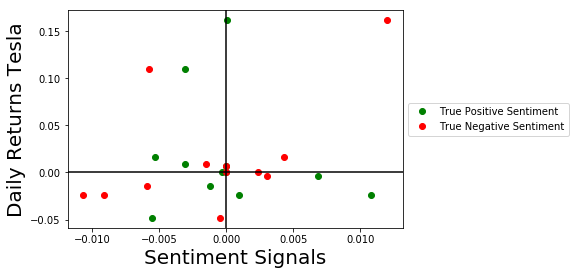

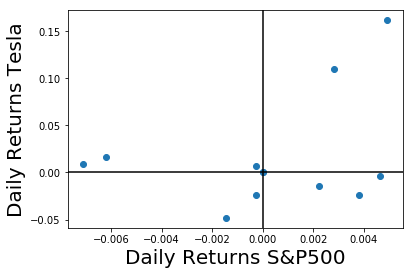

In [6]:
plt.plot(y_tp,daily_return_target_car,"o",c="g",label="True Positive Sentiment")
plt.plot(y_tn,daily_return_target_car,"o",c="r",label="True Negative Sentiment")
plt.axvline(x=0, color='k')
plt.axhline(y=0, color='k')
plt.ylabel("Daily Returns "+target_car,size=20)
plt.xlabel("Sentiment Signals",size=20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("data/"+target_car+"/"+target_car+"_daily_returns_vs_sentiment_data.pdf",bbox_inches="tight")
plt.show()

plt.plot(daily_return_sp500,daily_return_target_car,"o")
plt.axvline(x=0, color='k')
plt.axhline(y=0, color='k')
plt.xlabel("Daily Returns S&P500",size=20)
plt.ylabel("Daily Returns "+target_car,size=20)
plt.savefig("data/"+target_car+"/"+target_car+"_sp500_vs_daily_returns.pdf",bbox_inches="tight")
plt.show()

# Bayesian Parameter Estimation

Now we will carry out the Bayesian parameter estimation using the package __emcee__ 

$$
P(\beta_{P}|D) = \int d\sigma \int d\beta_N \int d\beta_M \int d\alpha \ P(D|\alpha,\beta_{N},\beta_M,\sigma)P(\alpha)P(\beta_M)P(\beta_N)P(\sigma)
$$



In [7]:
import emcee
import scipy.optimize as op

def lnlike(theta,x1,x2,x3,y):
    
    alpha,b1,b2,b3,sigma= theta
    
    model = alpha+b1*x1+b2*x2 +b3*x3 
    
    inv_sigma2 = 1.0/sigma**2
    
    s = -0.5*(np.sum((y-model)**2*inv_sigma2 - np.log(inv_sigma2)))
    
    return s

def lnprior(theta):
    alpha,b1,b2,b3,sigma = theta
    
    if sigma >=1.0e-5 and sigma <= 0.2 and (-100 <= b1 and b1 <= 100) and (-100 <= b2 and b2 <= 100) and (-100 <= b3 and b3 <= 100):
        return -np.log(sigma)
    
    
    return -np.inf

def lnprob(theta, x1,x2,x3, y):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, x1,x2,x3, y)


nll = lambda *args: -lnlike(*args)

x1 = y_tp
x2 = y_tn
x3 = daily_return_sp500
y = daily_return_target_car

result = op.minimize(nll, np.random.rand(5), args=(x1,x2,x3, y))
result["x"] = np.abs(result["x"])

m_ml, b1_ml,b2_ml,b3_ml,sigma_ml = result["x"]

print("Optimized Estimates: ", m_ml,b1_ml,b2_ml,b3_ml,sigma_ml)

ndim, nwalkers = 5, N_mcmc_walkers
pos = [result["x"] + 1e-2*np.random.randn(ndim) for i in range(nwalkers)]
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(x1,x2,x3, y))
sampler.run_mcmc(pos, N_mcmc_runs)
samples = sampler.chain[:, N_mcmc_burn:, :].reshape((-1, ndim))

Optimized Estimates:  0.0173094876936 5.29011190905 3.95890231616 9.06761697275 0.0418410467696


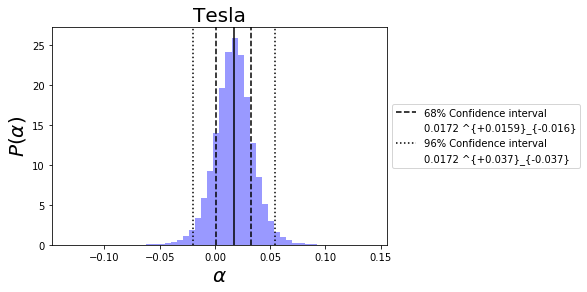

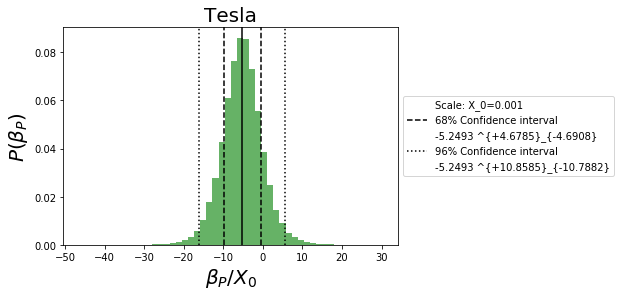

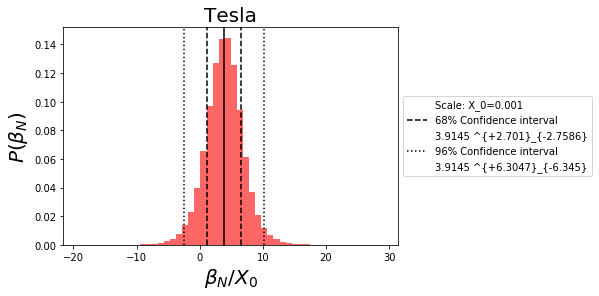

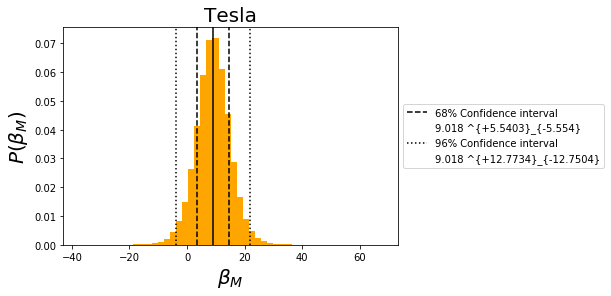

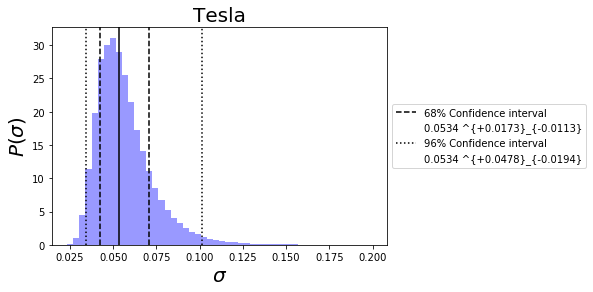

In [8]:
N_round = 4

s=samples[:,0]
median, q1, q3,q4,q5 = np.percentile(s, 50), np.percentile(s, 16), np.percentile(s, 84), np.percentile(s,2),np.percentile(s,98)
plt.axvline(x=median, color='k')
plt.axvline(x=q1, color='k',linestyle="--",label="68% Confidence interval")
plt.axvline(x=q3, color='k',linestyle="--")
plt.plot([], [], ' ', label=str(round(median,N_round))+" "+"^{+"+str(round(q3-median,N_round))+"}"+"_{-"+str(round(median-q1,N_round))+"}")
plt.axvline(x=q4, color='k',linestyle=":",label="96% Confidence interval")
plt.axvline(x=q5, color='k',linestyle=":")
plt.plot([], [], ' ', label=str(round(median,N_round))+" "+"^{+"+str(round(q5-median,N_round))+"}"+"_{-"+str(round(median-q4,N_round))+"}")
plt.ylabel(r"$P(\alpha )$", size=20)
plt.xlabel(r"$\alpha$", size=20)
plt.hist(s,bins=50,density=True,alpha=0.4,color="b")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(target_car,size=20)
plt.savefig("data/"+target_car+"/"+target_car+"_alpha_pdf.pdf",bbox_inches="tight")
plt.show()

s=samples[:,1]
#s=s*b1_scale
median, q1, q3,q4,q5 = np.percentile(s, 50), np.percentile(s, 16), np.percentile(s, 84), np.percentile(s,2),np.percentile(s,98)
plt.plot([], [], ' ', label="Scale: X_0="+str(b1_scale))
plt.axvline(x=median, color='k')
plt.axvline(x=q1, color='k',linestyle="--",label="68% Confidence interval")
plt.axvline(x=q3, color='k',linestyle="--")
plt.plot([], [], ' ', label=str(round(median,N_round))+" "+"^{+"+str(round(q3-median,N_round))+"}"+"_{-"+str(round(median-q1,N_round))+"}")
plt.axvline(x=q4, color='k',linestyle=":",label="96% Confidence interval")
plt.axvline(x=q5, color='k',linestyle=":")
plt.plot([], [], ' ', label=str(round(median,N_round))+" "+"^{+"+str(round(q5-median,N_round))+"}"+"_{-"+str(round(median-q4,N_round))+"}")
plt.ylabel(r"$P(\beta_P )$", size=20)
plt.xlabel(r"$\beta_P/X_0$", size=20)
plt.hist(s,bins=50,density=True,alpha=0.6,color="g")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(target_car,size=20)
plt.savefig("data/"+target_car+"/"+target_car+"_beta_P_pdf.pdf",bbox_inches="tight")
plt.show()

s=samples[:,2]
#s=s*b2_scale
median, q1, q3,q4,q5 = np.percentile(s, 50), np.percentile(s, 16), np.percentile(s, 84), np.percentile(s,2),np.percentile(s,98)
plt.plot([], [], ' ', label="Scale: X_0="+str(b2_scale))
plt.axvline(x=median, color='k')
plt.axvline(x=q1, color='k',linestyle="--",label="68% Confidence interval")
plt.axvline(x=q3, color='k',linestyle="--")
plt.plot([], [], ' ', label=str(round(median,N_round))+" "+"^{+"+str(round(q3-median,N_round))+"}"+"_{-"+str(round(median-q1,N_round))+"}")
plt.axvline(x=q4, color='k',linestyle=":")
plt.axvline(x=q5, color='k',linestyle=":",label="96% Confidence interval")
plt.plot([], [], ' ', label=str(round(median,N_round))+" "+"^{+"+str(round(q5-median,N_round))+"}"+"_{-"+str(round(median-q4,N_round))+"}")
plt.ylabel(r"$P(\beta_N )$", size=20)
plt.xlabel(r"$\beta_N/X_0$", size=20)
plt.hist(s,bins=50,density=True,alpha=0.6,color="red")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(target_car,size=20)
plt.savefig("data/"+target_car+"/"+target_car+"_beta_N_pdf.pdf",bbox_inches="tight")
plt.show()

s=samples[:,3]
median, q1, q3,q4,q5 = np.percentile(s, 50), np.percentile(s, 16), np.percentile(s, 84), np.percentile(s,2),np.percentile(s,98)
plt.axvline(x=median, color='k')
plt.axvline(x=q1, color='k',linestyle="--",label="68% Confidence interval")
plt.axvline(x=q3, color='k',linestyle="--")
plt.plot([], [], ' ', label=str(round(median,N_round))+" "+"^{+"+str(round(q3-median,N_round))+"}"+"_{-"+str(round(median-q1,N_round))+"}")
plt.axvline(x=q4, color='k',linestyle=":")
plt.axvline(x=q5, color='k',linestyle=":",label="96% Confidence interval")
plt.plot([], [], ' ', label=str(round(median,N_round))+" "+"^{+"+str(round(q5-median,N_round))+"}"+"_{-"+str(round(median-q4,N_round))+"}")
plt.ylabel(r"$P(\beta_M)$", size=20)
plt.xlabel(r"$\beta_M$", size=20)
plt.hist(s,bins=50,density=True,alpha=1.0,color="orange")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(target_car,size=20)
plt.savefig("data/"+target_car+"/"+target_car+"_beta_M_pdf.pdf",bbox_inches="tight")
plt.show()

#fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True)
s=samples[:,4]
median, q1, q3,q4,q5 = np.percentile(s, 50), np.percentile(s, 16), np.percentile(s, 84), np.percentile(s,2),np.percentile(s,98)
plt.axvline(x=median, color='k')
plt.axvline(x=q1, color='k',linestyle="--",label="68% Confidence interval")
plt.axvline(x=q3, color='k',linestyle="--")
plt.plot([], [], ' ', label=str(round(median,N_round))+" "+"^{+"+str(round(q3-median,N_round))+"}"+"_{-"+str(round(median-q1,N_round))+"}")
plt.axvline(x=q4, color='k',linestyle=":")
plt.axvline(x=q5, color='k',linestyle=":",label="96% Confidence interval")
plt.plot([], [], ' ', label=str(round(median,N_round))+" "+"^{+"+str(round(q5-median,N_round))+"}"+"_{-"+str(round(median-q4,N_round))+"}")
plt.ylabel(r"$P(\sigma)$", size=20)
plt.xlabel(r"$\sigma$", size=20)
plt.hist(s,bins=50,density=True,alpha=0.4,color="blue")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(target_car,size=20)
plt.savefig("data/"+target_car+"/"+target_car+"_sigma_pdf.pdf",bbox_inches="tight")
plt.show()

# Now we generate a box plot to show the joint probability distributions of all estimated parameters 

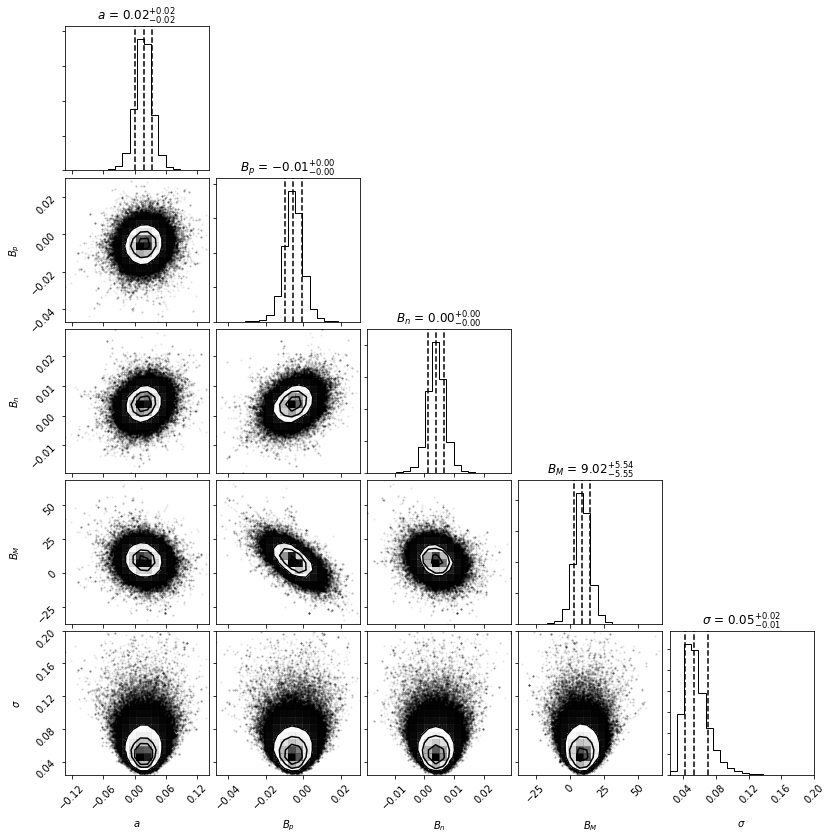

In [9]:
import corner

samples[:,1]=samples[:,1]*b1_scale
samples[:,2]=samples[:,2]*b2_scale

fig = corner.corner(samples,labels=["$a$", "$B_p$","$B_n$","$B_M$","$\sigma$"], quantiles=[0.16, 0.5, 0.84],
                    show_titles=True,
                    title_kwargs={"fontsize": 12})
fig.savefig("data/"+target_car+"/"+target_car+"_corner_plot.pdf")

# We then produce a summary of the median, and compute the 68% and 96% confidence intervals of the parameters

In [10]:
a_mcmc, b1_mcmc,b2_mcmc,b3_mcmc,sigma_mcmc = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0],v[4]-v[1],v[1]-v[3]),
                             zip(*np.percentile(samples, [16, 50, 84,2,98],
                                                axis=0)))

print("====================================================\n")
print("Parameter estimation for: "+ target_car+"\n")

print("The 68% Confidence regions")
print("a_mcmc = %.04f ^{+%0.03f}_{-%0.03f}"%(a_mcmc[0],a_mcmc[1],a_mcmc[2]))
print("bP_mcmc = %.04f ^{+%0.03f}_{-%0.03f}"%(b1_mcmc[0],b1_mcmc[1],b1_mcmc[2]))
print("bN_mcmc = %.04f ^{+%0.03f}_{-%0.03f}"%(b2_mcmc[0],b2_mcmc[1],b2_mcmc[2]))
print("bM_mcmc = %.04f ^{+%0.03f}_{-%0.03f}"%(b3_mcmc[0],b3_mcmc[1],b3_mcmc[2]))
print("sigma_mcmc = %.04f ^{+%0.03f}_{-%0.03f}"%(sigma_mcmc[0],sigma_mcmc[1],sigma_mcmc[2]))

print("\n")
print("The 96% Confidence regions")
print("a_mcmc = %.04f ^{+%0.03f}_{-%0.03f}"%(a_mcmc[0],a_mcmc[3],a_mcmc[4]))
print("bP_mcmc = %.04f ^{+%0.03f}_{-%0.03f}"%(b1_mcmc[0],b1_mcmc[3],b1_mcmc[4]))
print("bN_mcmc = %.04f ^{+%0.03f}_{-%0.03f}"%(b2_mcmc[0],b2_mcmc[3],b2_mcmc[4]))
print("bM_mcmc = %.04f ^{+%0.03f}_{-%0.03f}"%(b3_mcmc[0],b3_mcmc[3],b3_mcmc[4]))
print("sigma_mcmc = %.04f ^{+%0.03f}_{-%0.03f}"%(sigma_mcmc[0],sigma_mcmc[3],sigma_mcmc[4]),"\n")

print("Correlation between B1 and B2:", np.corrcoef(samples[:,1], (samples[:,2]))[0,1])
print("====================================================\n")


Parameter estimation for: Tesla

The 68% Confidence regions
a_mcmc = 0.0172 ^{+0.016}_{-0.016}
bP_mcmc = -0.0052 ^{+0.005}_{-0.005}
bN_mcmc = 0.0039 ^{+0.003}_{-0.003}
bM_mcmc = 9.0180 ^{+5.540}_{-5.554}
sigma_mcmc = 0.0534 ^{+0.017}_{-0.011}


The 96% Confidence regions
a_mcmc = 0.0172 ^{+0.037}_{-0.037}
bP_mcmc = -0.0052 ^{+0.011}_{-0.011}
bN_mcmc = 0.0039 ^{+0.006}_{-0.006}
bM_mcmc = 9.0180 ^{+12.773}_{-12.750}
sigma_mcmc = 0.0534 ^{+0.048}_{-0.019} 

Correlation between B1 and B2: 0.313922446393



# Examine the residuals of the linear regression model
<p></p>
The residuals are expected to be normally distributed with mean=0 and stdev similar to the best fit generated by the Bayesian model. If this is not true, there may be an issue with the fitted model.

residual mean: -0.0038
residual std: 0.0562


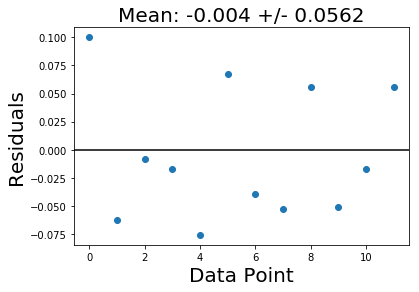

In [11]:
model = a_mcmc[0]+b1_mcmc[0]*x1+b2_mcmc[0]*x2 +b3_mcmc[0]*x3     
res = (y-model)

print("residual mean: %.04f"%res.mean())
print("residual std: %.04f"%res.std())

plt.plot(res,"o")
plt.title("Mean: "+str(np.round(res.mean(),3))+" +/- "+str(np.round(res.std(),4)) ,size=20)
plt.ylabel("Residuals",size=20)
plt.xlabel("Data Point", size=20)
plt.axhline(y=0, color='k')
plt.savefig("data/"+target_car+"/"+target_car+"_model_residuals.pdf",bbox_inches="tight")
plt.show()